<a href="https://colab.research.google.com/github/mahmoodminhas009/INSE_6220/blob/main/Sample_Project_Classification_with_PyCaret%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [21]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

In [22]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

**Import Libraries**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.12.2


**Dataset**

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.


**Attribute Information:**

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience renaimed as class ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 ).



**Link:**

https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [25]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mahmoodminhas009/INSE_6220/main/administration%20dataset.csv')
df.head(25)

GRE Score  TOEFL Score  SOP  CGPA  Chance of Admit   class
0         337          118  4.5  9.65              0.92      1
1         324          107  4.0  8.87              0.76      1
2         316          104  3.0  8.00              0.72      1
3         322          110  3.5  8.67              0.80      1
4         314          103  2.0  8.21              0.65      0
5         330          115  4.5  9.34              0.90      1
6         321          109  3.0  8.20              0.75      1
7         308          101  3.0  7.90              0.68      0
8         302          102  2.0  8.00              0.50      0
9         323          108  3.5  8.60              0.45      0
10        325          106  3.5  8.40              0.52      1
11        327          111  4.0  9.00              0.84      1
12        328          112  4.0  9.10              0.78      1
13        307          109  4.0  8.00              0.62      1
14        311          104  3.5  8.20              0.61      1
15        314          105  3.5  8.30              0.54      0
16        317          107  4.0  8.70              0.66      0
17        319          106  4.0  8.00              0.65      1
18        318          110  4.0  8.80              0.63      0
19        303          102  3.5  8.50              0.62      0
20        312          107  3.0  7.90              0.64      1
21        325          114  3.0  8.40              0.70      0
22        328          116  5.0  9.50              0.94      1
23        334          119  5.0  9.70              0.95      1
24        336          119  4.0  9.80              0.97      1

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE Score         400 non-null    int64  
 1   TOEFL Score       400 non-null    int64  
 2   SOP               400 non-null    float64
 3   CGPA              400 non-null    float64
 4   Chance of Admit   400 non-null    float64
 5   class             400 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.9 KB


In [27]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [28]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

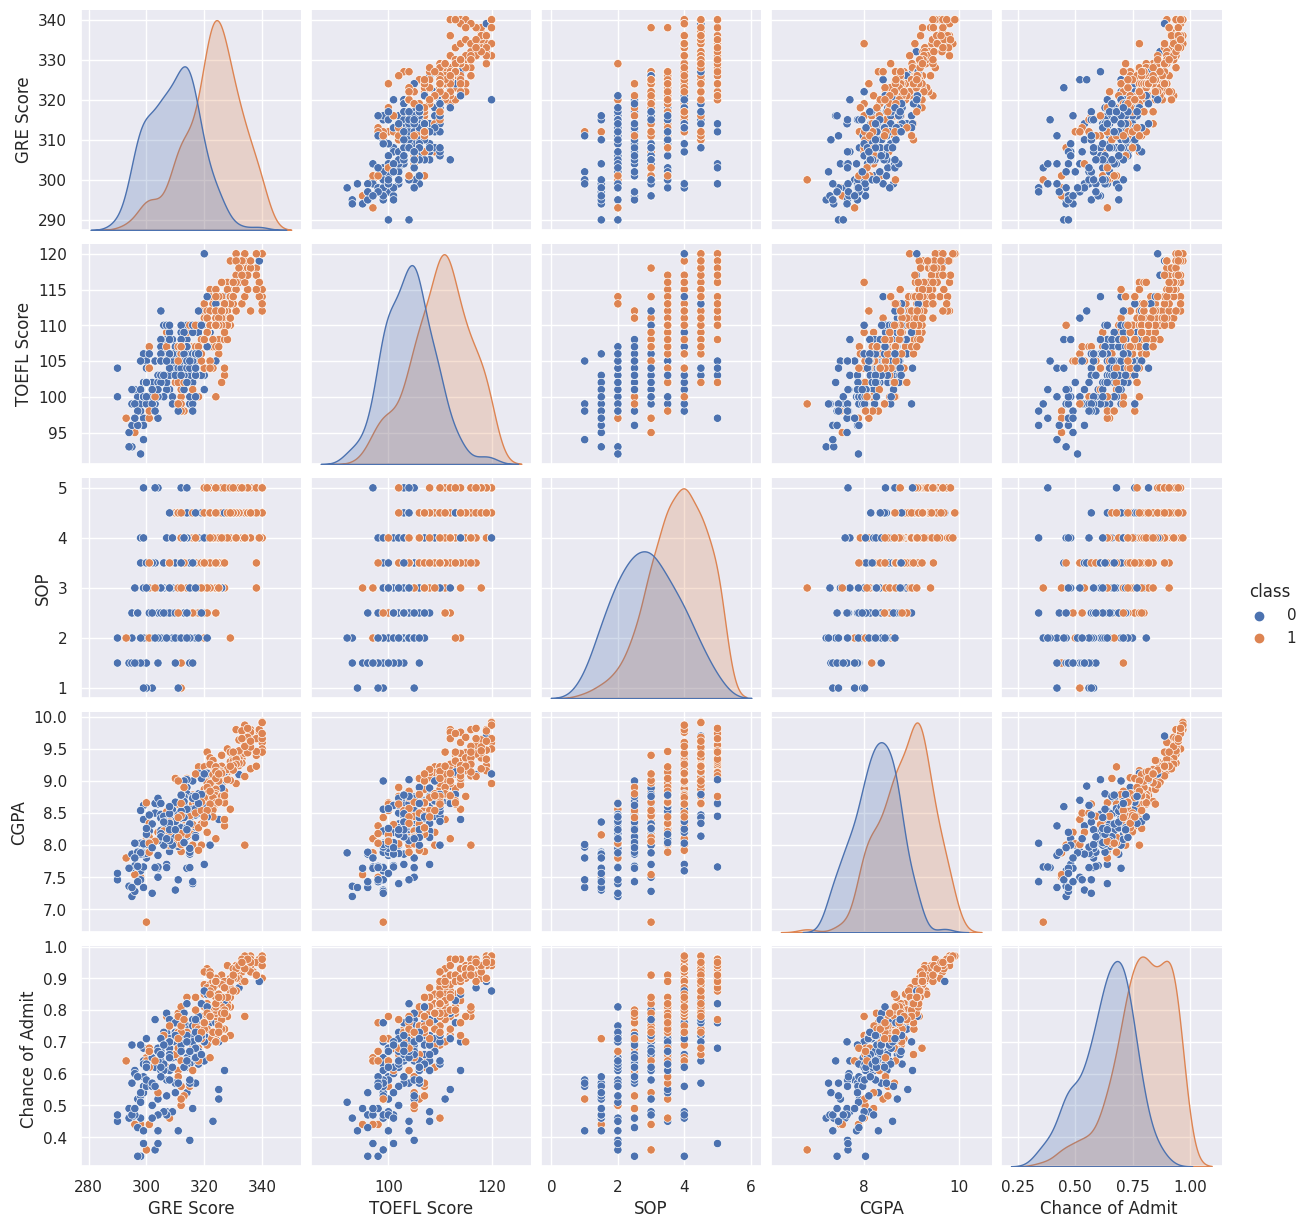

In [29]:
sns.pairplot(df, hue='class')
plt.show()

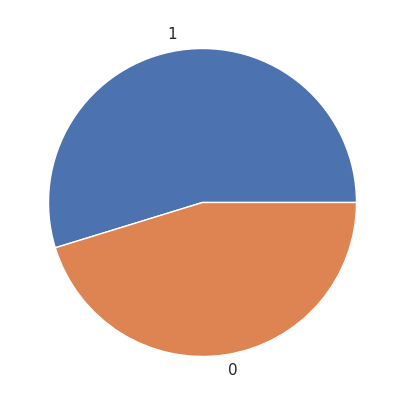

In [30]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [31]:
X = df.drop(columns=['class'])
X.head(10)

GRE Score  TOEFL Score  SOP  CGPA  Chance of Admit 
0        337          118  4.5  9.65              0.92
1        324          107  4.0  8.87              0.76
2        316          104  3.0  8.00              0.72
3        322          110  3.5  8.67              0.80
4        314          103  2.0  8.21              0.65
5        330          115  4.5  9.34              0.90
6        321          109  3.0  8.20              0.75
7        308          101  3.0  7.90              0.68
8        302          102  2.0  8.00              0.50
9        323          108  3.5  8.60              0.45

In [32]:
X.describe().transpose()

count        mean        std     min     25%     50%  \
GRE Score         400.0  316.807500  11.473646  290.00  308.00  317.00   
TOEFL Score       400.0  107.410000   6.069514   92.00  103.00  107.00   
SOP               400.0    3.400000   1.006869    1.00    2.50    3.50   
CGPA              400.0    8.598925   0.596317    6.80    8.17    8.61   
Chance of Admit   400.0    0.724350   0.142609    0.34    0.64    0.73   

                       75%     max  
GRE Score         325.0000  340.00  
TOEFL Score       112.0000  120.00  
SOP                 4.0000    5.00  
CGPA                9.0625    9.92  
Chance of Admit     0.8300    0.97

**Standardize the Data**

In [34]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score       SOP      CGPA  Chance of Admit 
0   1.762107     1.746971  1.093864  1.764818          1.373648
1   0.627656    -0.067635  0.596653  0.455151          0.250297
2  -0.070467    -0.562528 -0.397769 -1.005631         -0.030541
3   0.453126     0.427257  0.099442  0.119339          0.531135
4  -0.244998    -0.727492 -1.392191 -0.653029         -0.522007
5   1.151249     1.252078  1.093864  1.244310          1.233229
6   0.365860     0.262293 -0.397769 -0.669819          0.180087
7  -0.768590    -1.057420 -0.397769 -1.173537         -0.311379
8  -1.292182    -0.892456 -1.392191 -1.005631         -1.575149
9   0.540391     0.097329  0.099442  0.001805         -1.926196

In [35]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
GRE Score         400.0  2.664535e-17  1.001252 -2.339367 -0.768590  0.016799   
TOEFL Score       400.0 -8.881784e-18  1.001252 -2.542098 -0.727492 -0.067635   
SOP               400.0  8.881784e-18  1.001252 -2.386613 -0.894980  0.099442   
CGPA              400.0  4.440892e-18  1.001252 -3.020504 -0.720191  0.018596   
Chance of Admit   400.0  2.664535e-17  1.001252 -2.698500 -0.592217  0.039668   

                       75%       max  
GRE Score         0.714922  2.023903  
TOEFL Score       0.757186  2.076899  
SOP               0.596653  1.591075  
CGPA              0.778370  2.218165  
Chance of Admit   0.741763  1.724695

**Observations and variables**

In [36]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

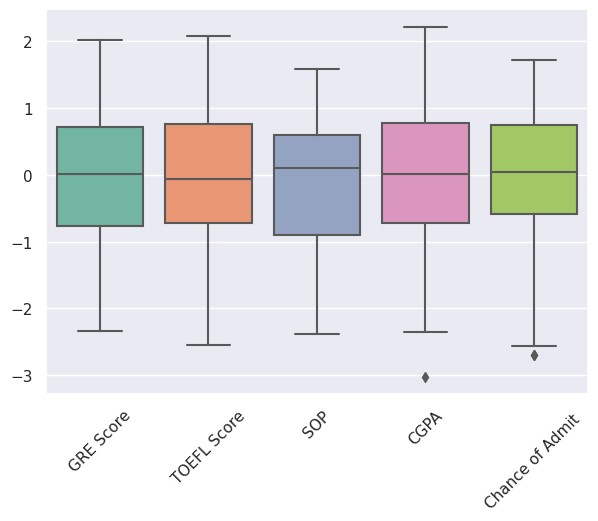

In [37]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

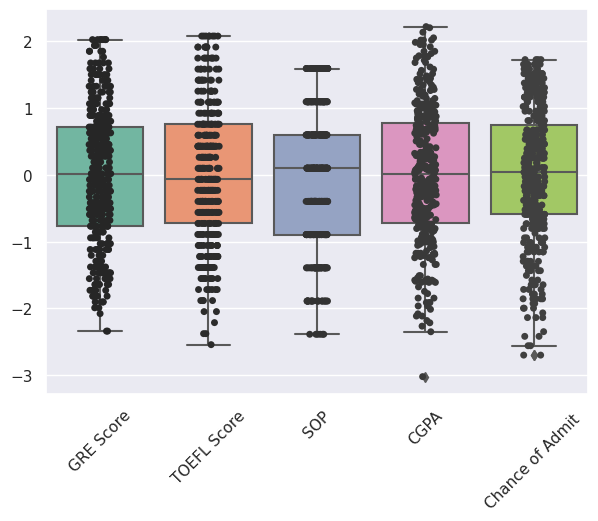

In [38]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

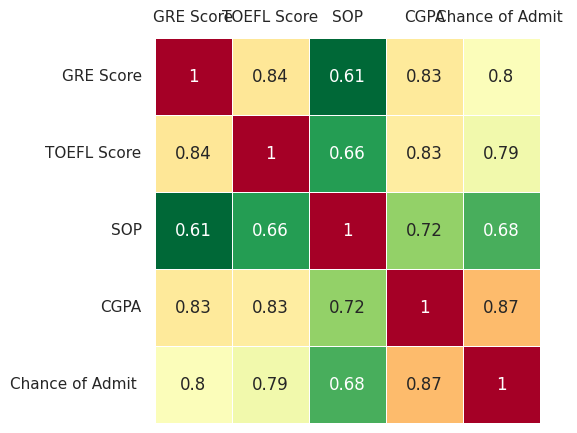

In [39]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

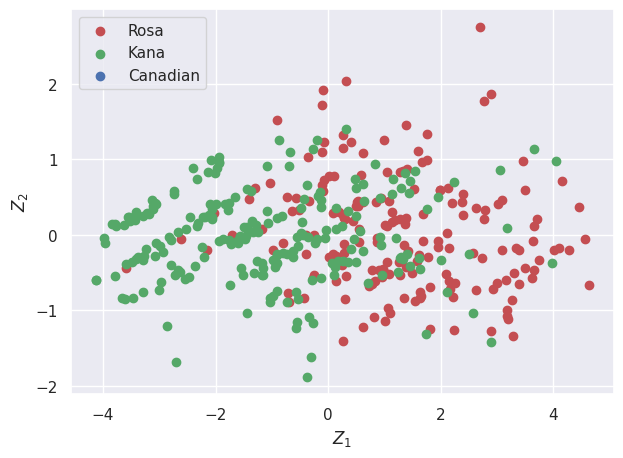

In [40]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

Eigen Vectors
[[-0.45161031 -0.38077701  0.29721669  0.73651638  0.14234764]
 [-0.45437919 -0.22773591  0.56683005 -0.64225589  0.08880866]
 [-0.39911765  0.88713953  0.16575646  0.12782685  0.09936618]
 [-0.46982203 -0.05658249 -0.3082134  -0.03358751 -0.82458599]
 [-0.45777728 -0.11369736 -0.68402868 -0.16608182  0.53106918]]


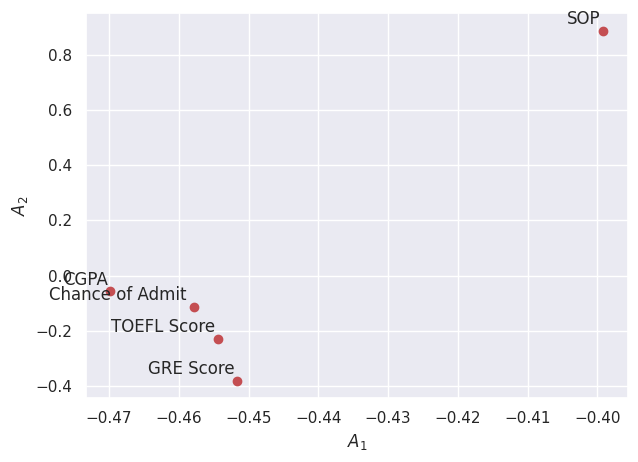

In [41]:
A = pca.components_.T
print("Eigen Vectors")
print(A)

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

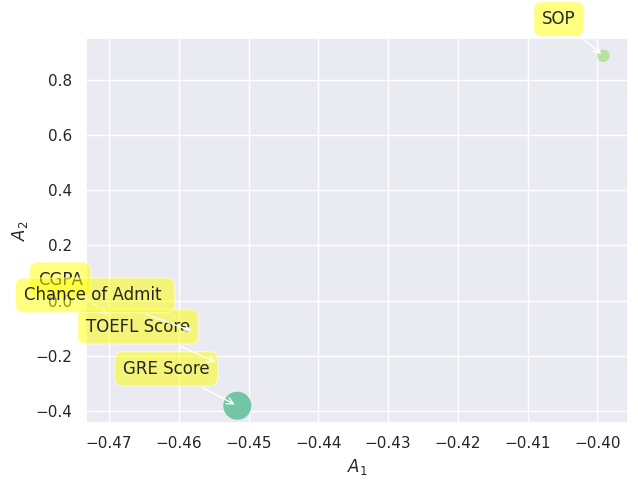

In [42]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Eigen Values
[4.07310888 0.43673761 0.22560234 0.15879421 0.11828829]


Text(0, 0.5, 'Explained variance')

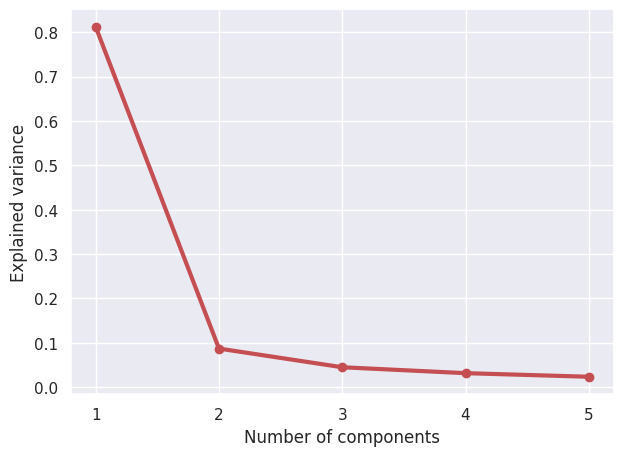

In [43]:
#Eigenvalues
Lambda = pca.explained_variance_
print("Eigen Values")
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

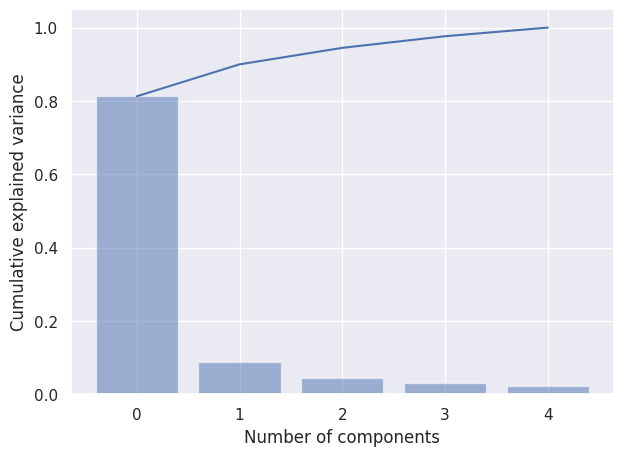

In [44]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [45]:
print("Values of Scree Plot in Perecentage")
print(ell.round(4)*100)

Values of Scree Plot in Perecentage
[81.26  8.71  4.5   3.17  2.36]


**Biplot**

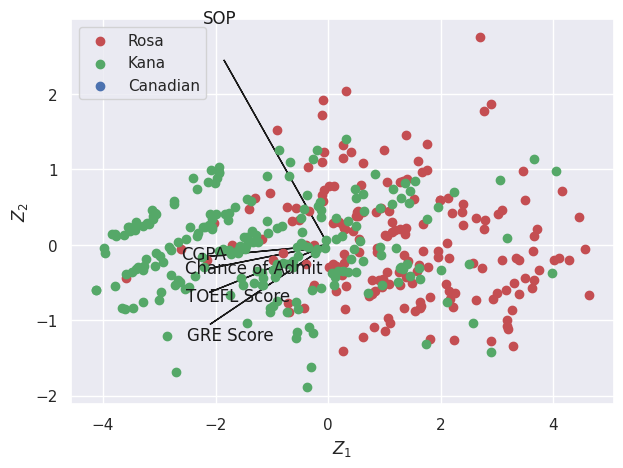

In [46]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [47]:
!pip install pca

In [48]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [49]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.484129 -0.354445  0.211723  0.028230
1   -0.819279  0.251509 -0.064382  0.525130
2    0.932630 -0.137563 -0.074894  0.297390
3   -0.737672 -0.248764 -0.006751 -0.020183
4    1.542619 -0.879801 -0.157606  0.217461
..        ...       ...       ...       ...
395 -1.172650 -0.366338 -0.242407  0.064175
396 -0.908246 -0.750573 -0.711682  0.355469
397 -3.066880  0.421371  0.077095 -0.123282
398  0.512171  0.439824 -0.353263  0.224121
399 -3.554288  0.232235 -0.052366 -0.094899

[400 rows x 4 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (81.2% expl.var)', ylabel='PC2 (8.71% expl.var)'>)

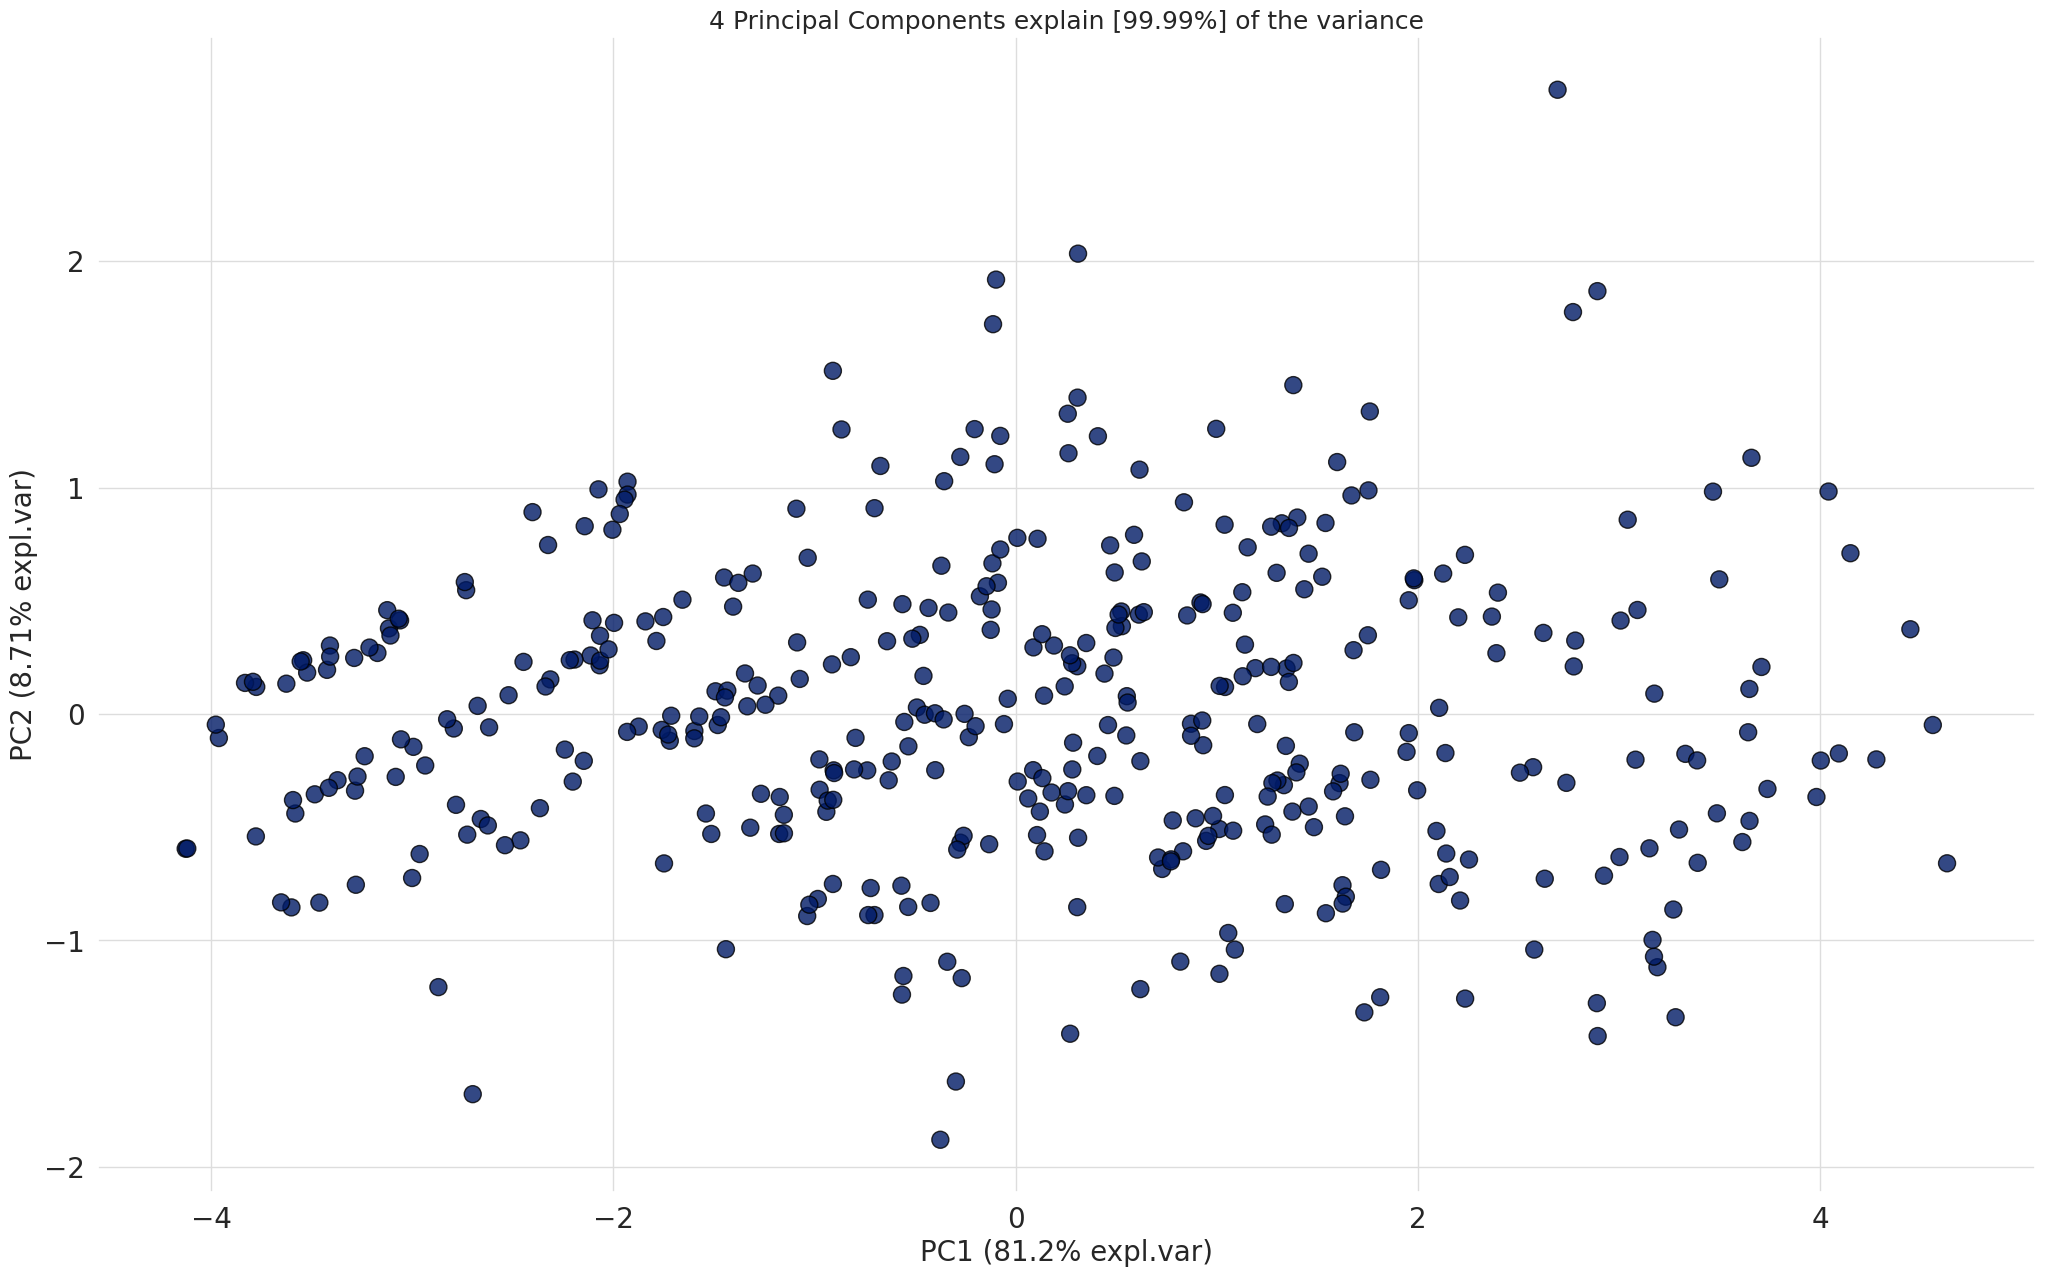

In [50]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [51]:
A = out['loadings'].T

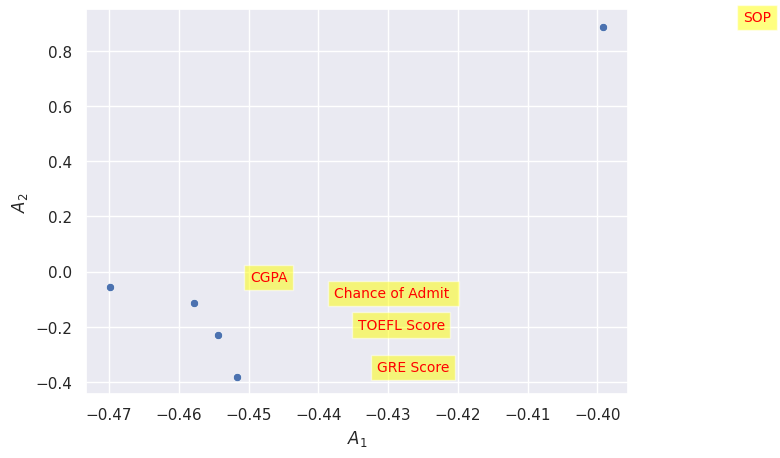

In [52]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

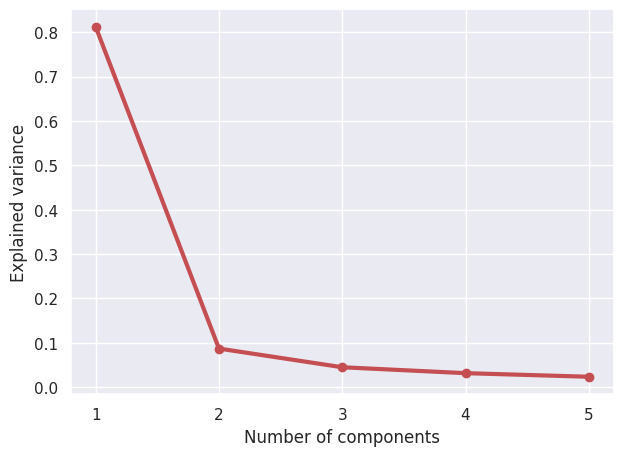

In [53]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

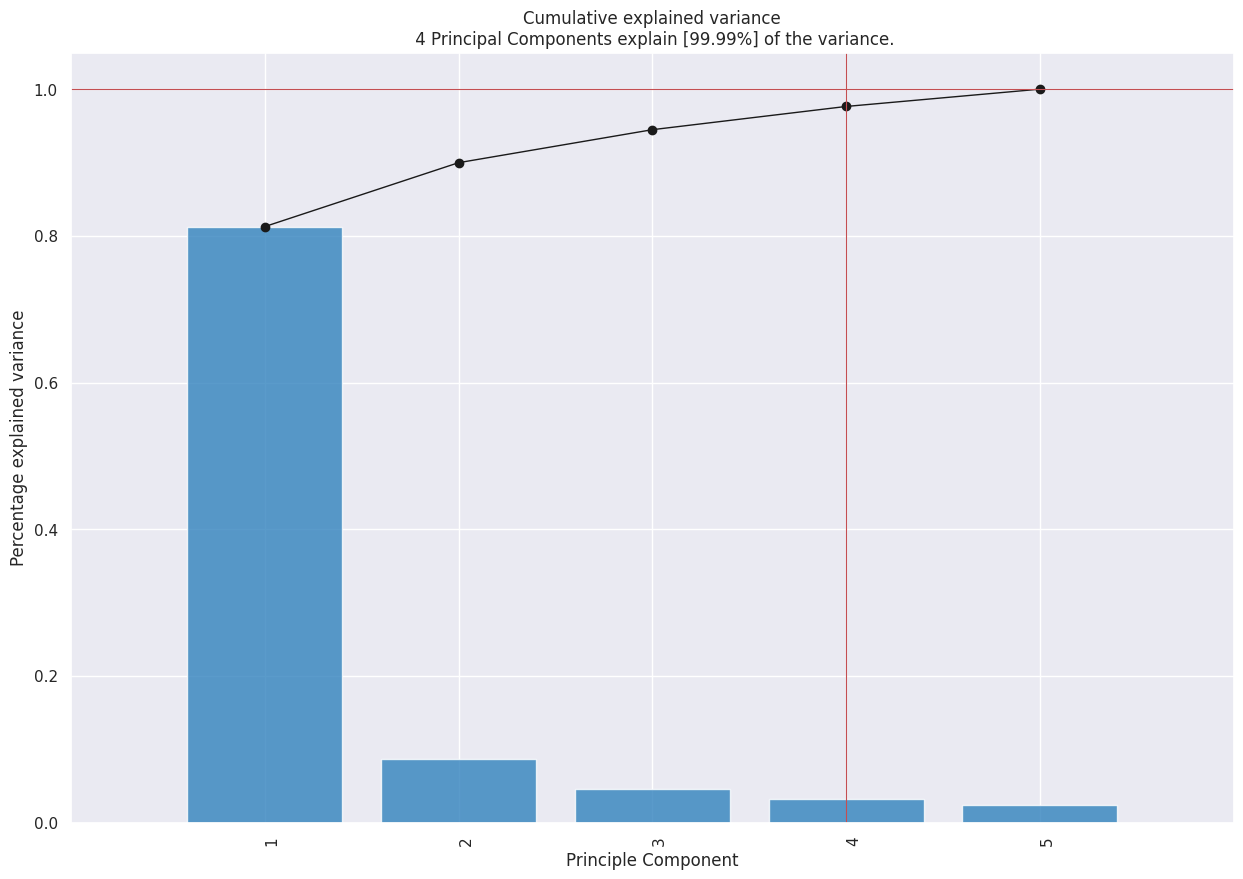

In [54]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (81.2% expl.var)', ylabel='PC2 (8.71% expl.var)'>)

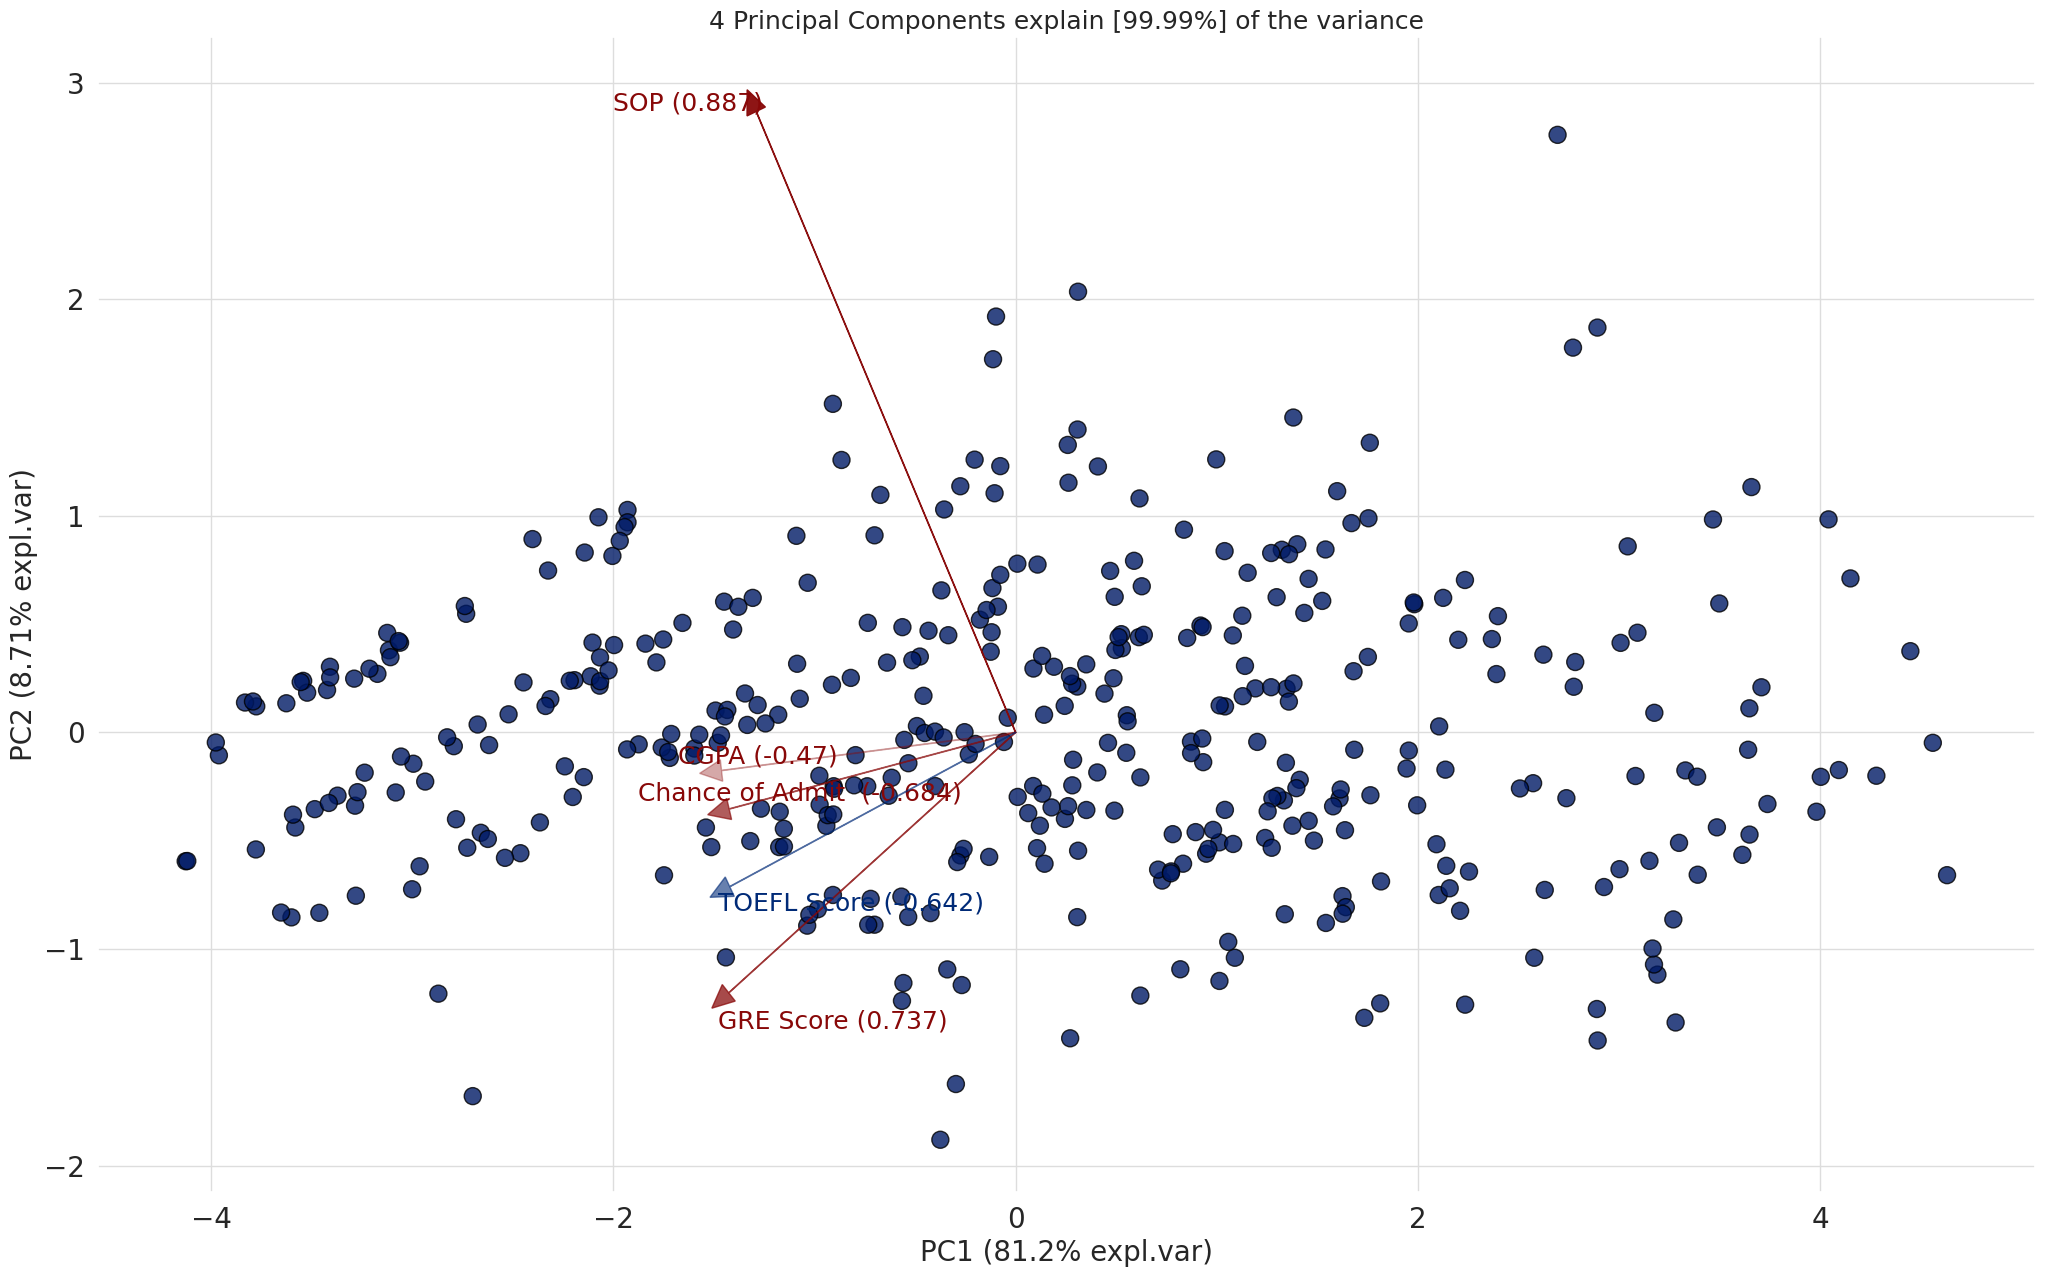

In [55]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (81.2% expl.var)', ylabel='PC2 (8.71% expl.var)', zlabel='PC3 (4.50% expl.var)'>)

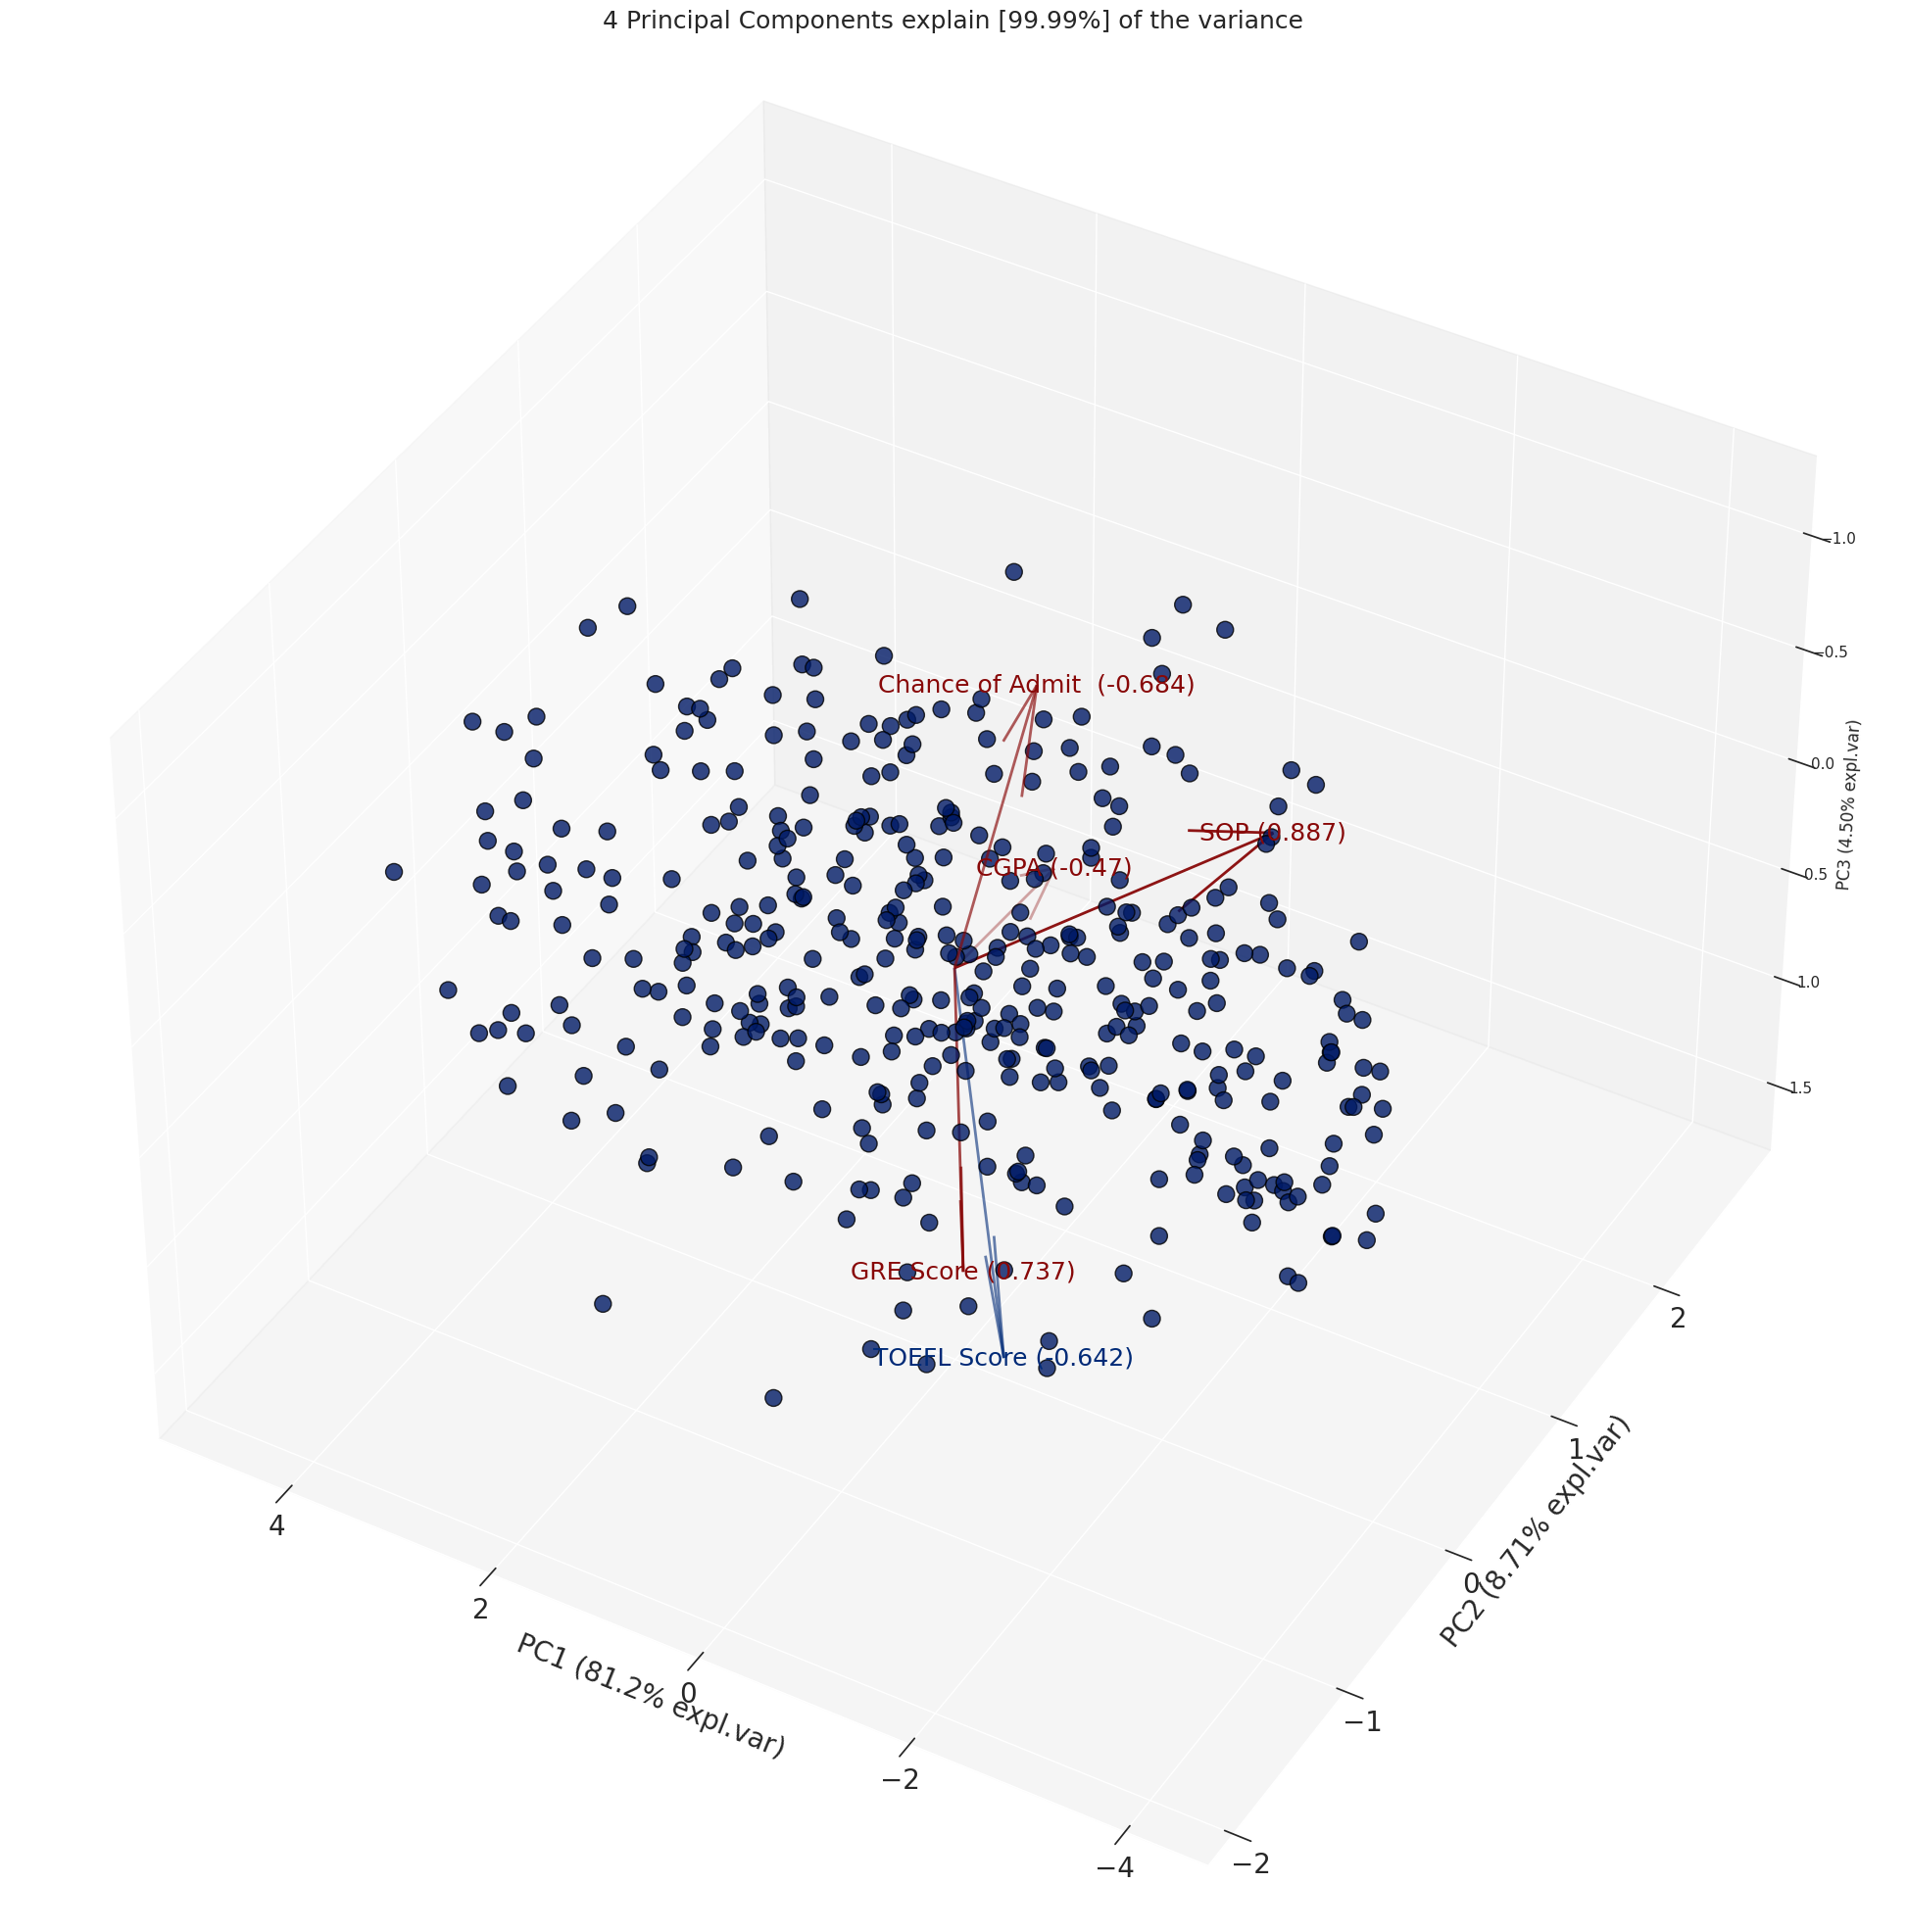

In [56]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [57]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (360, 6)
Unseen Data For Predictions: (40, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [58]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing All Models**

In [59]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [60]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [61]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [63]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [65]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [66]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [67]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [68]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [69]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [70]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [71]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [72]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [73]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [74]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [75]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [76]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
tuned_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [78]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [79]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [80]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [81]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [82]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [84]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [115]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [106]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [107]:
tuned_et = tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [108]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [109]:
ada = create_model('ada')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [110]:
tuned_ada = tune_model(ada)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [111]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [85]:
!pip install shap

In [86]:
print("Numpy version: ", np.__version__)

Numpy version:  1.25.2


In [87]:
!pip install numba

In [88]:
import shap

In [89]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [90]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

In [91]:
!pip install shap

In [92]:
!pip install pycaret[analysis]

In [93]:
!pip install shap

In [94]:
import shap

In [95]:
# Check if there is a variable named 'interpret_model'
if 'interpret_model' in globals():
    # Print a warning message
    print("Warning: The 'interpret_model' variable is overwriting the function.")

In [96]:
pip install --upgrade interpret

In [97]:
import interpret


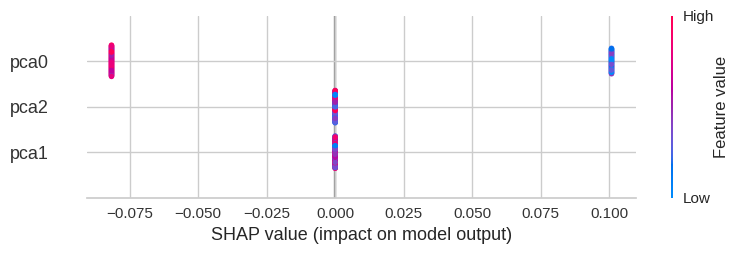

In [98]:
interpret_model(tuned_rf_pca, plot='summary')

In [99]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [100]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [101]:
interpret_model(tuned_rf_pca, plot='reason')